In [ ]:
import json
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Ouvrir le fichier en mode lecture
with open('accidents_file.geojson', 'r') as f:
    # Charger les données JSON
    data = json.load(f)

In [ ]:
def calculate_wcss(data, k_range):
  wcss = []
  for k  in k_range:
    kmeans =  KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  return wcss


In [ ]:

features = data['features']
cordinates = []
for feature in features:
  #properties = feature['properties']
  geometry = feature['geometry']
  cordinates.append(geometry['coordinates'])



In [ ]:
#Convert to numpy array
cordinates = np.array(cordinates)

#Define the range of k values
k_range = range(1,11)

#Calculate WCSS for different values of k
wcss_values = calculate_wcss(cordinates, k_range)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
geometry

{'type': 'Point', 'coordinates': [-7.676503624793609, 33.59109752921518]}

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[0, 0], zoom_start = 2)

In [ ]:
folium.GeoJson(data).add_to(m)

In [ ]:
m

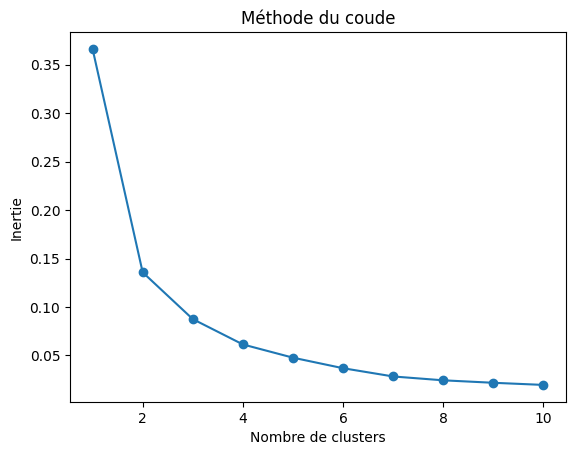

In [ ]:
# Tracez le graphique de l'inertie par rapport au nombre de clusters
plt.plot(k_range, wcss_values, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

In [ ]:
# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(cordinates)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the labels for each data point
labels  = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_centers

array([[-7.53490767, 33.5770088 ],
       [-7.68658234, 33.56368949],
       [-7.60292715, 33.55457091]])

In [ ]:
data

{'type': 'FeatureCollection',
 'name': 'accidents_file',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'id': 1},
   'geometry': {'type': 'Point',
    'coordinates': [-7.740588528520491, 33.52591403879599]}},
  {'type': 'Feature',
   'properties': {'id': 2},
   'geometry': {'type': 'Point',
    'coordinates': [-7.734619836506714, 33.536912293014566]}},
  {'type': 'Feature',
   'properties': {'id': 3},
   'geometry': {'type': 'Point',
    'coordinates': [-7.72613801101345, 33.5287946691698]}},
  {'type': 'Feature',
   'properties': {'id': 5},
   'geometry': {'type': 'Point',
    'coordinates': [-7.681215750067644, 33.541363569583396]}},
  {'type': 'Feature',
   'properties': {'id': 6},
   'geometry': {'type': 'Point',
    'coordinates': [-7.679959183327902, 33.537174139158175]}},
  {'type': 'Feature',
   'properties': {'id': 7},
   'geometry': {'type': 'Point',
    'coordinates': [-7.71325820193108

In [ ]:
map_center = [np.mean(cordinates[:,1]), np.mean(cordinates[:, 0])]
m = folium.Map(map_center, zoom_start = 10)

In [ ]:
for idx, coord in enumerate(cordinates):
  folium.CircleMarker(
      location = [coord[1], coord[0]],
      radius = 5,
      color = 'purple' if labels[idx] == 0 else 'blue' if labels[idx] == 1 else 'green',
      fill = True,
      fill_color = 'purple' if labels[idx] == 0 else 'blue' if labels[idx] == 1 else 'green'
  ).add_to(m)

In [ ]:
for center in cluster_centers:
  folium.Marker(
      location = [center[1], center[0]],
      icon = folium.Icon(color = 'red')
  ).add_to(m)

In [ ]:
m